# Visualizing AlphaFold 3 structures with py3DMol

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/GoogleCloudPlatform/scientific-computing-examples/tree/main/hcls/af3-colab/AlphaFold_3_py3DMol.ipynb)


AlphaFold 3 (AF3), developed by Google DeepMind and Isomorphic Labs, is a revolutionary AI model that predicts the 3D structure of biomolecular complexes—including proteins, DNA, RNA, small molecules (ligands), ions, and chemically modified residues—with unprecedented accuracy. Its core technology builds upon AlphaFold 2, utilizing an updated and simplified "Pairformer" module and a novel diffusion-based generative model, which directly predicts raw atomic coordinates, similar to how AI models generate images. The primary goal of AF3 is to transform our understanding of biological processes and accelerate scientific discovery, particularly in drug design.

In this notebook, we will visualize the structures of generated by AF3 using py3DMol. py3DMol which allows for dependency-free molecular visualization in Jupyter notebooks. py3DMol wraps the 3DMol.js library for online molecular visualization.

This notebook is an adapted version of Lab 02 of IIBM3202 Molecular Modeling and Simulation from the Institute for Biological and Engineering at Pontificia Universidad Catolica de Chile.

As a first step, we will need to install the package.

In [ ]:
try:
  import py3Dmol
except:
  !pip install py3Dmol
  import py3Dmol

You will need to upload the confidences file you dowloaded in the previous step.  Add the path here:

In [ ]:

confidences_file = '/content/protein-rna-ion_pdb_8aw3_confidences.json'

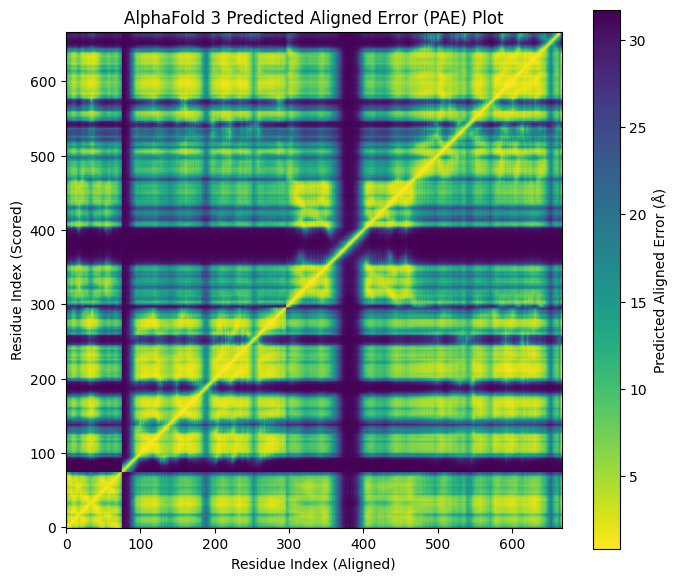

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Assuming your PAE data is in a JSON file
# Replace 'your_alphafold_output.json' with the actual path to your PAE JSON
try:
    with open(confidences_file, 'r') as f:
        alphafold_output = json.load(f)
        # The exact key for PAE might vary, check your AF3 output structure
        # It's commonly under 'predicted_aligned_error' or similar
        pae_matrix = np.array(alphafold_output['pae'])

    plt.figure(figsize=(8, 7))
    plt.imshow(pae_matrix, cmap='viridis_r', origin='lower') # _r reverses colormap for low error = dark
    plt.colorbar(label='Predicted Aligned Error (Å)')
    plt.xlabel('Residue Index (Aligned)')
    plt.ylabel('Residue Index (Scored)')
    plt.title('AlphaFold 3 Predicted Aligned Error (PAE) Plot')
    plt.show()

except FileNotFoundError:
    print("Error: AlphaFold output JSON file not found.")
except KeyError:
    print("Error: 'predicted_aligned_error' key not found in the JSON. Check the output format.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
import py3Dmol

# Example CIF data (for a simple molecule, e.g., water)
# In a real scenario, this would come from a file read or an API response.
cif_data = """
#
"""
with open('/content/protein-rna-ion_pdb_8aw3_model.cif', 'r') as f:
    cif_data = f.read()

# 1. Create a py3Dmol viewer
view = py3Dmol.view(width=1000, height=800)

# 2. Add the CIF model data
# The second argument 'cif' tells py3Dmol to parse the data as a CIF file.
view.addModel(cif_data, 'cif')

# 3. Apply a style (e.g., licorice, stick, sphere, cartoon)
# 'stick' is a good general purpose style for small molecules.
#view.setStyle({'stick': {}})
# Or for a "licorice" look:
view.setStyle({'cartoon': {}})

# 4. Zoom to fit the model in the viewer
view.zoomTo()

# 5. Display the viewer
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.